# Import Libraries

In [4]:
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from astropy.io import ascii
from scipy import optimize
from scipy import curve_fit

# Reading the file and converting time stamps to total hours

In [184]:
data = ascii.read('group-data.txt')
day=np.zeros(len(data))
height=np.zeros(len(data))
time=np.zeros(len(data))
hours = np.zeros(len(data))
day_hours = np.zeros(len(data))
for i in range(len(data)):
    day[i] = data[i][0]
    datetime_obj = datetime.strptime(data[i][1], "%H:%M")  #parse time define the hour and the minute
    hours[i] = datetime_obj.hour + datetime_obj.minute / 60     #add the minutes / 60 to the hours to get total hours
    day_hours[i] = day[i] + hours[i] / 24
    #rounded_hours = [round(hours,1)for hours in hours_list] 
    height[i] = data[i][2]

In [193]:
time = np.linspace(1,42,45)
amplitude = 3.78
frequency = 0.5
phase = np.pi / -6.0
tide_height = amplitude * np.sin(2 * np.pi * frequency * time + phase) + np.random.normal(scale=0.5, size=len(time))
shifted_tide_height = tide_height + 2.7

Making a plot...


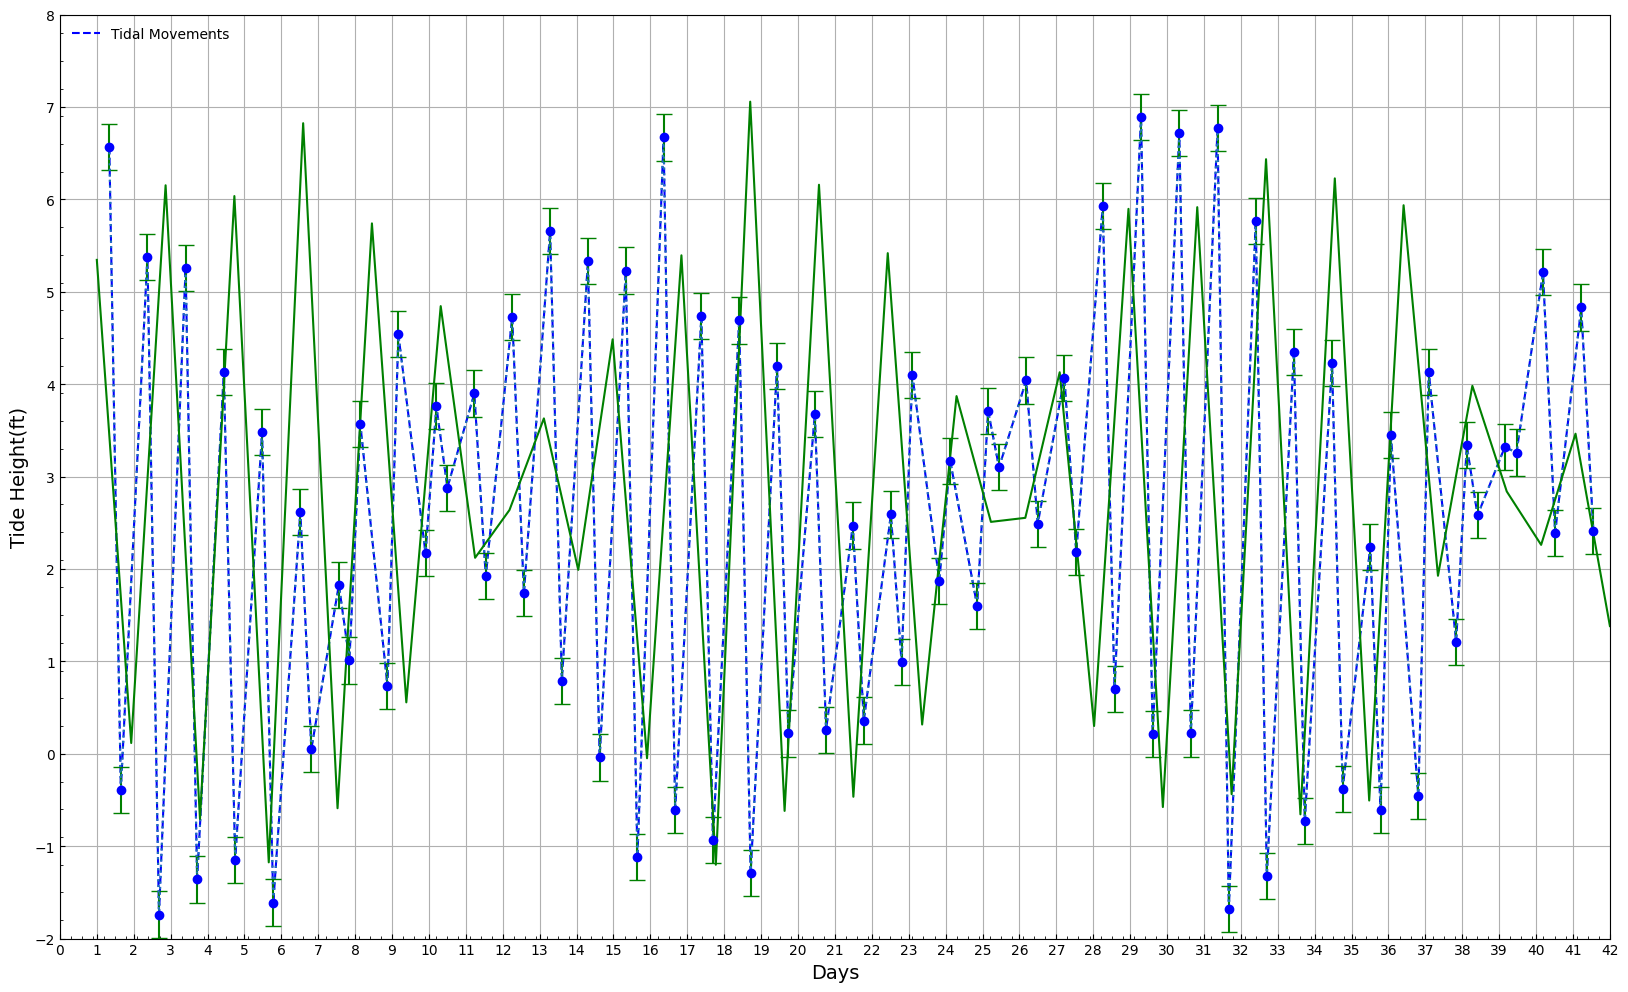

In [194]:
def scatter_plot(x, y,
                 flag_save=True,    # save the figure?
                 xlabel='Days',        # x-axis label
                 ylabel='Tide Height(ft)',        # y-axis label
                 lcolor='blue',      # line color
                 pcolor='black',     # point color
                 fs=14,):             # font size
    
    # Define a figure and axis
    f, ax = plt.subplots(1, 1, figsize=(20, 12))

    ax.grid(True)

    ax.xaxis.set_tick_params(which='major', direction='in')
    ax.yaxis.set_tick_params(which='major', direction='in')
    ax.xaxis.set_tick_params(which='minor', direction='in')
    ax.yaxis.set_tick_params(which='minor', direction='in')


    ax.xaxis.set_major_locator(MultipleLocator(1.))
    ax.xaxis.set_minor_locator(MultipleLocator(0.3))

    ax.yaxis.set_major_locator(MultipleLocator(1.))
    ax.yaxis.set_minor_locator(MultipleLocator(0.3))

    # Plot y vs. x
    ax.plot(x, y, color=lcolor, linewidth=1.5, linestyle='dashed', label='Tidal Movements')  # a line

    yerr=0.25
    ax.errorbar(x,y,yerr=0.25,fmt='bo',capsize=6.0,ecolor='green')     # fmt = format = blue dot

    # Label our axes
    ax.set_xlabel(xlabel, fontsize=fs)
    ax.set_ylabel(ylabel, fontsize=fs)

    ax.set_xlim(0, 42)
    ax.set_ylim(-2, 8)

    # Create a legend without a frame
    # in the upper left-hand corner
    ax.legend(loc='upper left', frameon=False)

    plt.plot(x, y, ':', label='data')

    if flag_save:
        plt.savefig(fname='group_graph.pdf', bbox_inches='tight', dpi=400)

print('Making a plot...')

    #define x: Day of the year
x_data = day_hours

    #define y: Tide Height
y_data = height

# make the plot
scatter_plot(x_data, y_data)
plt.plot(time, shifted_tide_height, label='Shifted Tide Data', color='green', linestyle='-')


In [155]:
t = np.arange(1,41,1)

h = 3.2 * np.sin(2.7*t + 8.5)
h = A * np.sin(w*t + (startingpoint))

NameError: name 'A' is not defined

In [50]:
def o_func(x, a, b, c):
    return a * np.sin(b * x + c)
initial_guess = [-8.0, 2.0, 2.0]
rms_error = 0.25
weights = np.full_like(y_data, 1.0 / rms_error)
params, params_covariance = optimize.curve_fit(o_func, x_data, y_data,       
p0=initial_guess, sigma=weights, absolute_sigma=True)
best_curve = o_func(x_data, params[0], params[1], params[2])
A_fit, B_fit, C_fit = params
best_fit = o_func(x_data, A_fit, B_fit, C_fit)

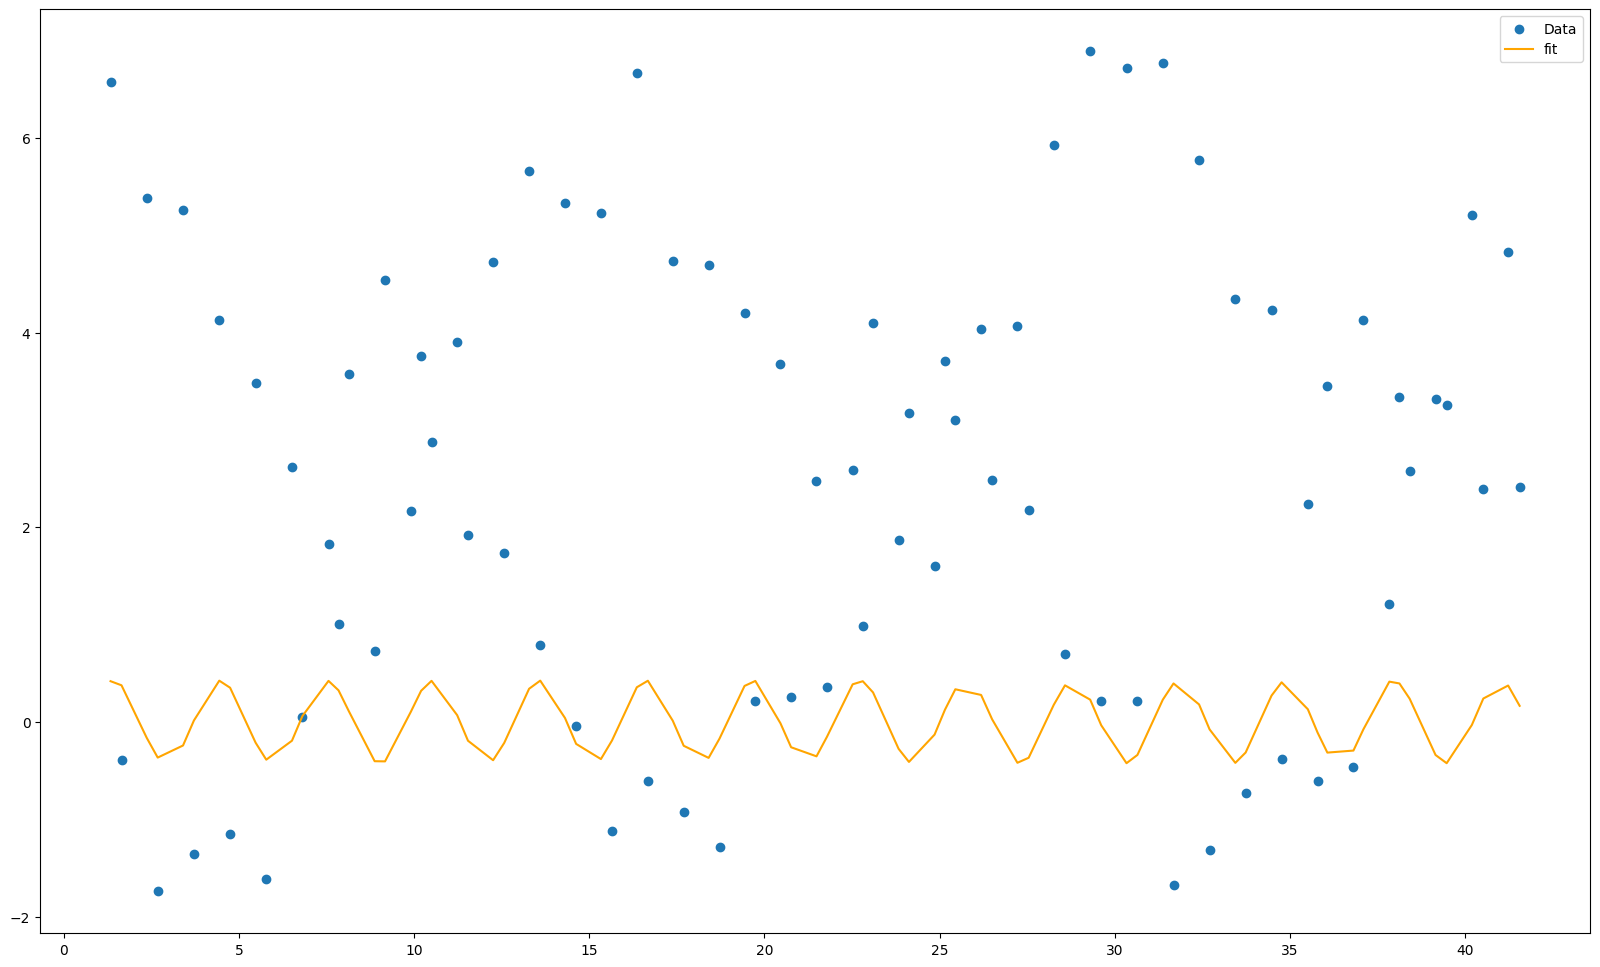

In [51]:
# plt.figure(figsize=(20,12))
# plt.scatter(x_data, y_data, label='Data')
# plt.plot(x_data, best_fit, label='fit', color='orange')
# plt.legend(loc='best')
# plt.show()

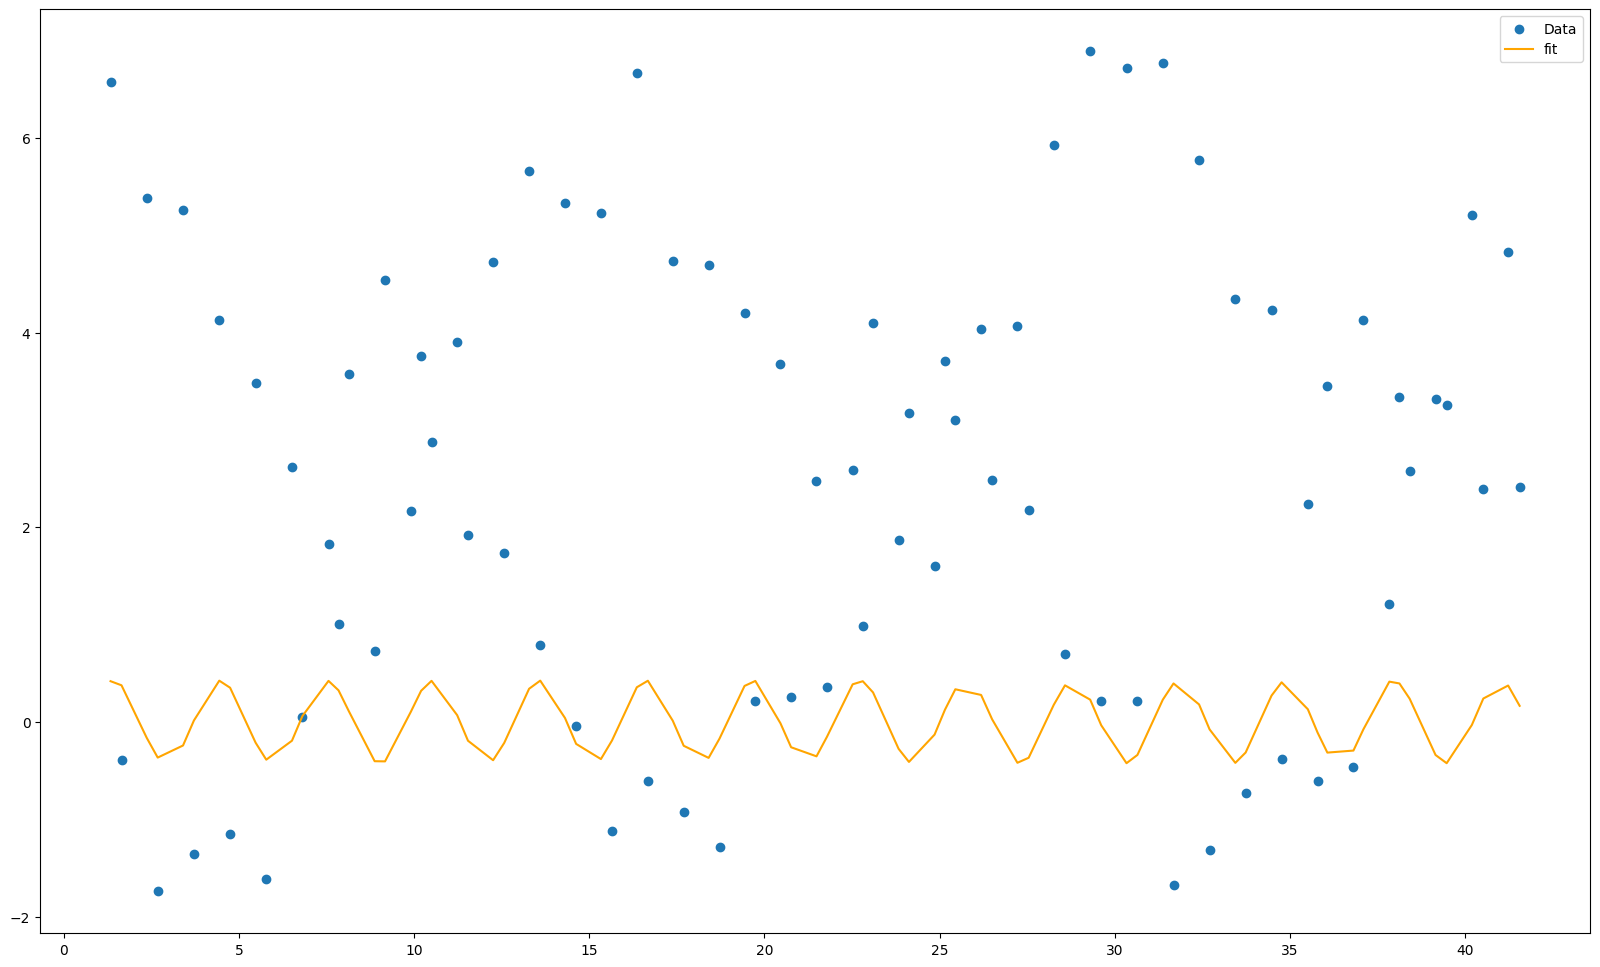

In [52]:
# A_fit = 7.0
# mod_fit = o_func(x_data, A_fit, B_fit, C_fit)

# plt.figure(figsize=(20,12))
# plt.scatter(x_data, y_data, label='Data')
# plt.plot(x_data, best_fit, label='fit', color='orange')
# plt.legend(loc='best')
# plt.show()

In [113]:
time = np.linspace(1,42,42)
amplitude = -3.85
frequency = 0.5
phase = np.pi / 1.9
tide_height = amplitude * np.sin(2 * np.pi * frequency * time + phase) + np.random.normal(scale=0.5, size=len(time))
shifted_tide_height = tide_height + 2.5

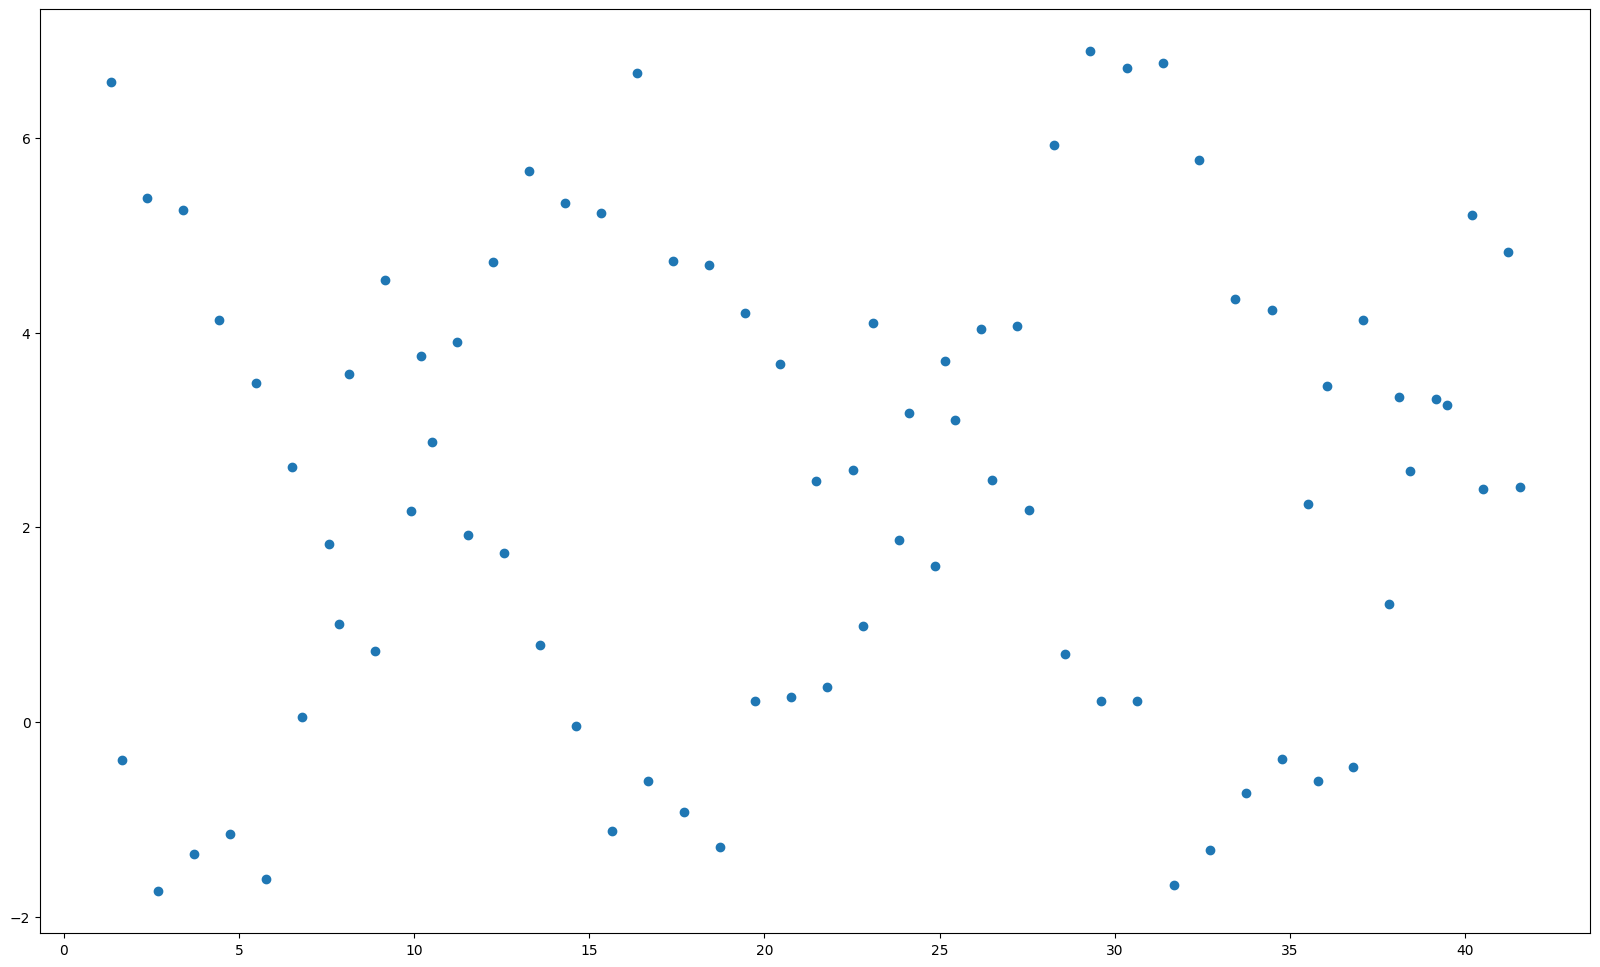

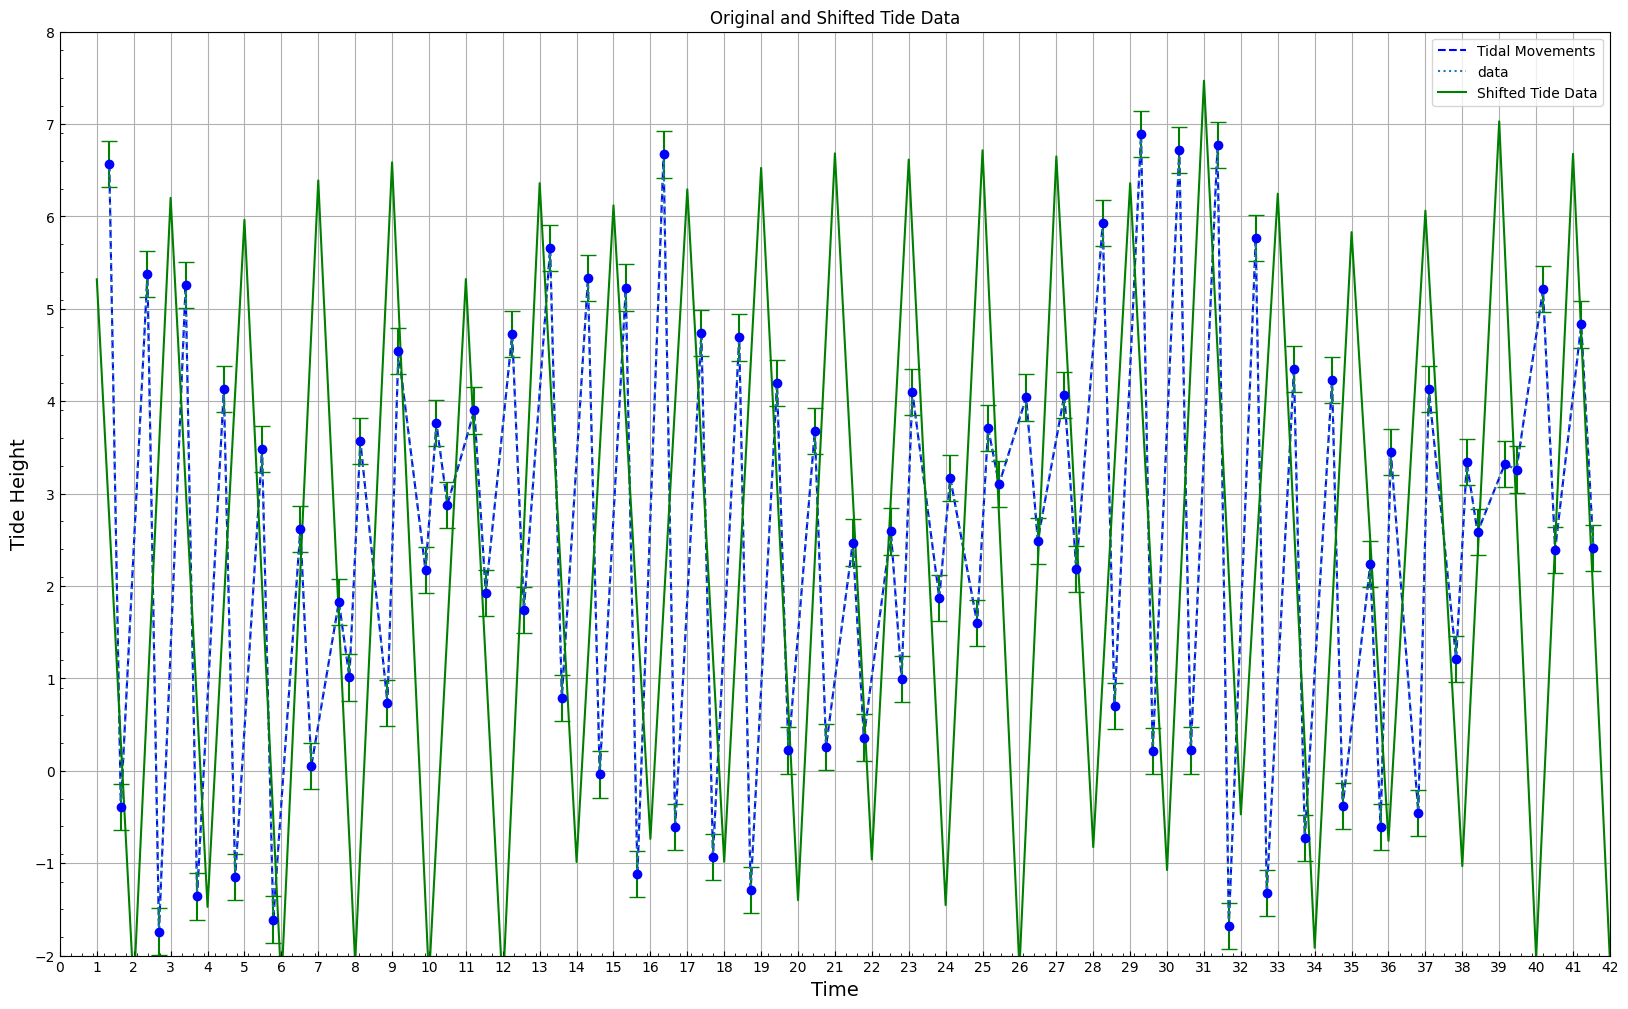

In [116]:
plt.figure(figsize=(20, 12))
plt.scatter(x_data, y_data, label='Data')
#scatter_plot(x_data, y_data)
scatter_plot(x_data, y_data)
plt.plot(time, shifted_tide_height, label='Shifted Tide Data', color='green', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Tide Height')
plt.title('Original and Shifted Tide Data')
plt.legend()
plt.show()